<a href="https://colab.research.google.com/github/nbilasals/employee_attrition/blob/main/prediction_of_employee_attrition_beforesplittingsmote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing libraries
import pandas as pd, numpy as np, seaborn as sns, plotly.express as px, xgboost as XGB, matplotlib.pyplot as plt,plotly.graph_objects as go, math
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [6]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv("/content/drive/My Drive/dataset/project/employee_attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
col_summary = pd.DataFrame(df.columns, columns = ['Column'])
na_list = []
unique_list = []
dtype_list = []

for col in df.columns:
    na_list.append(df[col].isna().sum())
    unique_list.append(df[col].nunique())
    dtype_list.append(df[col].dtype)
    
col_summary['Missing values'] = na_list
col_summary['Unique values'] = unique_list
col_summary['Data type'] = dtype_list
col_summary

,Column,Missing values,Unique values,Data type
0,Age,0,43,int64
1,Attrition,0,2,object
2,BusinessTravel,0,3,object
3,DailyRate,0,886,int64
4,Department,0,3,object
5,DistanceFromHome,0,29,int64
6,Education,0,5,int64
7,EducationField,0,6,object
8,EmployeeCount,0,1,int64
9,EmployeeNumber,0,1470,int64


No     1233
Yes     237
Name: Attrition, dtype: int64


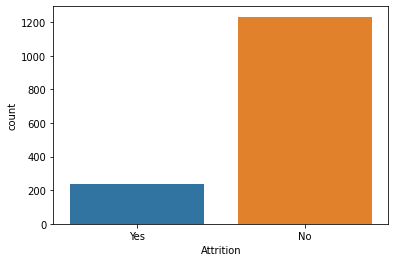

In [9]:
print(df['Attrition'].value_counts())
sns.countplot(x='Attrition',data=df) 

In [10]:
# pie chart for attrition
fig = go.Figure()
fig.add_trace(go.Pie(labels=df['Attrition'], values=df['Attrition'].value_counts()))
fig.update_layout(autosize=False, width=400, height=350)
fig.show()

In [11]:
# Dropping columns with little to no useful information
df = df.drop(['EmployeeCount',
                 'EmployeeNumber',
                 'Over18',
                  'StandardHours'],axis = 1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [12]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [13]:
# Checking for missing data
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Data Visualization and EDA

In [14]:
Attrition = df.query("Attrition == 'Yes'")
Attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,...,3,2,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,...,4,2,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,...,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,4,Male,...,3,1,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,Male,...,3,2,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,4,Male,...,3,4,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,2,Male,...,3,4,2,12,3,3,6,3,0,1


# Employee Attrition Prediction

In [15]:
# Splitting Dataset
X = df.drop('Attrition', axis = 1)
y = df.Attrition

In [16]:
# Enoding categorical variables with Ordinal Encoder
OE = OrdinalEncoder()
columns_OE = ['BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
             'JobSatisfaction','WorkLifeBalance','PerformanceRating','RelationshipSatisfaction']
X[columns_OE] = OE.fit_transform(X[columns_OE])
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,Sales,1,1.0,Life Sciences,1.0,Female,94,...,0.0,0.0,0,8,0,0.0,6,4,0,5
1,49,1.0,279,Research & Development,8,0.0,Life Sciences,2.0,Male,61,...,1.0,3.0,1,10,3,2.0,10,7,1,7
2,37,2.0,1373,Research & Development,2,1.0,Other,3.0,Male,92,...,0.0,1.0,0,7,3,2.0,0,0,0,0
3,33,1.0,1392,Research & Development,3,3.0,Life Sciences,3.0,Female,56,...,0.0,2.0,0,8,3,2.0,8,7,3,0
4,27,2.0,591,Research & Development,2,0.0,Medical,0.0,Male,40,...,0.0,3.0,1,6,3,2.0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,Research & Development,23,1.0,Medical,2.0,Male,41,...,0.0,2.0,1,17,3,2.0,5,2,0,3
1466,39,2.0,613,Research & Development,6,0.0,Medical,3.0,Male,42,...,0.0,0.0,1,9,5,2.0,7,7,1,7
1467,27,2.0,155,Research & Development,4,2.0,Life Sciences,1.0,Male,87,...,1.0,1.0,1,6,0,2.0,6,2,0,3
1468,49,1.0,1023,Sales,2,2.0,Medical,3.0,Male,63,...,0.0,3.0,0,17,3,1.0,9,6,0,8


In [17]:
X[columns_OE] 

,BusinessTravel,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,WorkLifeBalance,PerformanceRating,RelationshipSatisfaction
0,2.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0
1,1.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0
2,2.0,1.0,3.0,1.0,2.0,2.0,0.0,1.0
3,1.0,3.0,3.0,2.0,2.0,2.0,0.0,2.0
4,2.0,0.0,0.0,2.0,1.0,2.0,0.0,3.0
...,...,...,...,...,...,...,...,...
1465,1.0,1.0,2.0,3.0,3.0,2.0,0.0,2.0
1466,2.0,0.0,3.0,1.0,0.0,2.0,0.0,0.0
1467,2.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0
1468,1.0,2.0,3.0,1.0,1.0,1.0,0.0,3.0


In [18]:
# Transforming bicategoric variables into binary values
X['OverTime'].replace({'Yes': 1,
                                      'No':0}, inplace=True)
X['Gender'].replace({'Male': 1,
                                      'Female':0}, inplace=True)

In [19]:
X.OverTime.value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [20]:
  X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   float64
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   float64
 6   EducationField            1470 non-null   object 
 7   EnvironmentSatisfaction   1470 non-null   float64
 8   Gender                    1470 non-null   int64  
 9   HourlyRate                1470 non-null   int64  
 10  JobInvolvement            1470 non-null   float64
 11  JobLevel                  1470 non-null   int64  
 12  JobRole                   1470 non-null   object 
 13  JobSatisfaction           1470 non-null   float64
 14  MaritalS

In [21]:
# Enoding categorical variables
col_categorical = X.select_dtypes(include= ['object']).columns
for col in col_categorical:
    X[col] = X[col].astype('category')
X[col_categorical] = X[col_categorical].apply(lambda x: x.cat.codes)
X.head(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2,1,1.0,1,1.0,0,94,...,0.0,0.0,0,8,0,0.0,6,4,0,5
1,49,1.0,279,1,8,0.0,1,2.0,1,61,...,1.0,3.0,1,10,3,2.0,10,7,1,7
2,37,2.0,1373,1,2,1.0,4,3.0,1,92,...,0.0,1.0,0,7,3,2.0,0,0,0,0
3,33,1.0,1392,1,3,3.0,1,3.0,0,56,...,0.0,2.0,0,8,3,2.0,8,7,3,0
4,27,2.0,591,1,2,0.0,3,0.0,1,40,...,0.0,3.0,1,6,3,2.0,2,2,2,2


In [22]:
# Rescaling Data
Scaler = MinMaxScaler()
Scaling_Cols = ['TrainingTimesLastYear','YearsAtCompany','TotalWorkingYears',
               'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
               'PercentSalaryHike','Age','DailyRate','DistanceFromHome','HourlyRate',
               'MonthlyIncome','MonthlyRate','NumCompaniesWorked']
X[Scaling_Cols] = Scaler.fit_transform(X[Scaling_Cols])

In [23]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,2.0,0.715820,2,0.000000,1.0,1,1.0,0,0.914286,...,0.0,0.0,0,0.200,0.000000,0.0,0.150,0.222222,0.000000,0.294118
1,0.738095,1.0,0.126700,1,0.250000,0.0,1,2.0,1,0.442857,...,1.0,3.0,1,0.250,0.500000,2.0,0.250,0.388889,0.066667,0.411765
2,0.452381,2.0,0.909807,1,0.035714,1.0,4,3.0,1,0.885714,...,0.0,1.0,0,0.175,0.500000,2.0,0.000,0.000000,0.000000,0.000000
3,0.357143,1.0,0.923407,1,0.071429,3.0,1,3.0,0,0.371429,...,0.0,2.0,0,0.200,0.500000,2.0,0.200,0.388889,0.200000,0.000000
4,0.214286,2.0,0.350036,1,0.035714,0.0,3,0.0,1,0.142857,...,0.0,3.0,1,0.150,0.500000,2.0,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,1.0,0.559771,1,0.785714,1.0,3,2.0,1,0.157143,...,0.0,2.0,1,0.425,0.500000,2.0,0.125,0.111111,0.000000,0.176471
1466,0.500000,2.0,0.365784,1,0.178571,0.0,3,3.0,1,0.171429,...,0.0,0.0,1,0.225,0.833333,2.0,0.175,0.388889,0.066667,0.411765
1467,0.214286,2.0,0.037938,1,0.107143,2.0,1,1.0,1,0.814286,...,1.0,1.0,1,0.150,0.000000,2.0,0.150,0.111111,0.000000,0.176471
1468,0.738095,1.0,0.659270,2,0.035714,2.0,3,3.0,1,0.471429,...,0.0,3.0,0,0.425,0.500000,1.0,0.225,0.333333,0.000000,0.470588


In [24]:
# Changing y values
print(y.value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


In [25]:
y.replace({'No':0,
                'Yes':1}, inplace = True)

In [26]:
print(y.value_counts())

0    1233
1     237
Name: Attrition, dtype: int64


In [27]:
# Dealing with Class Imbalance using SMOTE
from imblearn.over_sampling import SMOTE
X,y = SMOTE().fit_resample(X,y)

In [28]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
print('X train size: ', len(X_train))
print('X test size: ', len(X_test))
print('y train size: ', len(y_train))
print('y test size: ', len(y_test))

X train size:  1726
X test size:  740
y train size:  1726
y test size:  740


In [29]:
y_train.value_counts()

0    875
1    851
Name: Attrition, dtype: int64

In [30]:
# Importing Models
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [31]:
adaboost = AdaBoostClassifier()
randomforest = RandomForestClassifier()
gradientboosting = GradientBoostingClassifier()
decisiontree = DecisionTreeClassifier()
xgboost =  XGBClassifier()

In [32]:
# Creating a function for predictions
def predict(model):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y_test, y_predict) * 100))
    print('Recall: %.2f%%' % (recall_score(y_test, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y_test, y_predict) * 100))
    confusion_matrix_model = confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

Accuracy: 81.49%
Precision: 80.86%
Recall: 84.03%
F1_Score: 82.41%


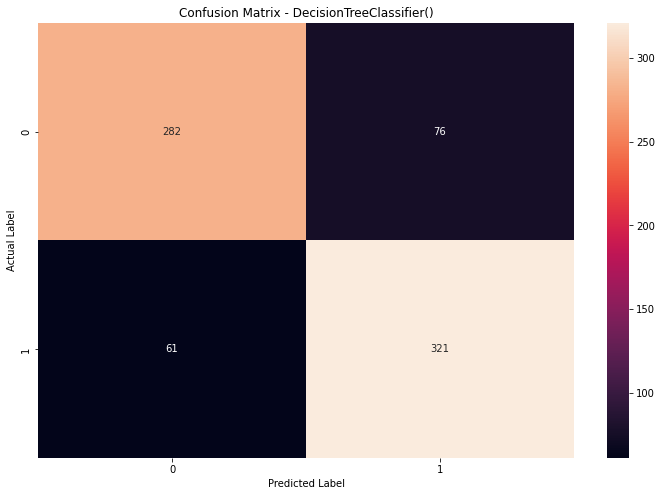

In [33]:
# Decision Tree
predict(decisiontree)

#### Ensemble Methods

Accuracy: 92.43%
Precision: 95.79%
Recall: 89.27%
F1_Score: 92.41%


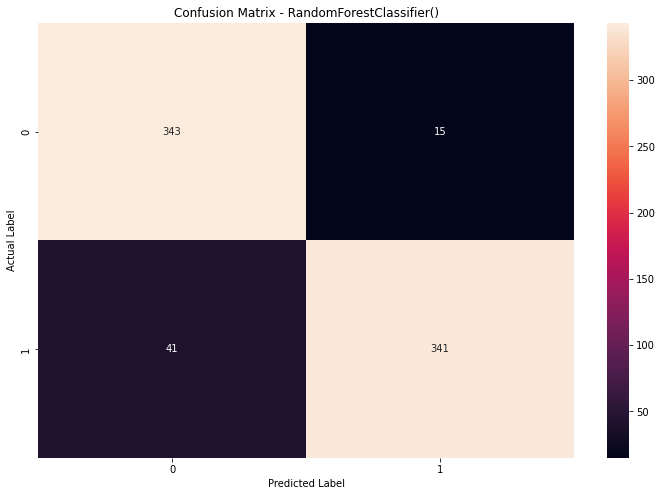

In [34]:
predict(randomforest)

Accuracy: 88.65%
Precision: 89.42%
Recall: 88.48%
F1_Score: 88.95%


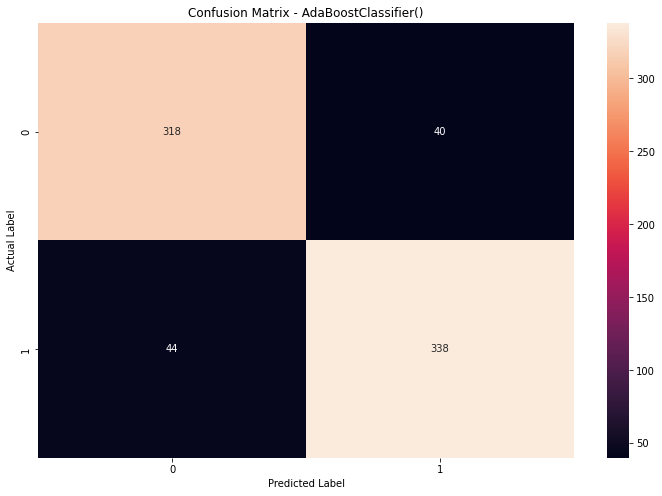

In [35]:
predict(adaboost)

Accuracy: 90.95%
Precision: 93.63%
Recall: 88.48%
F1_Score: 90.98%


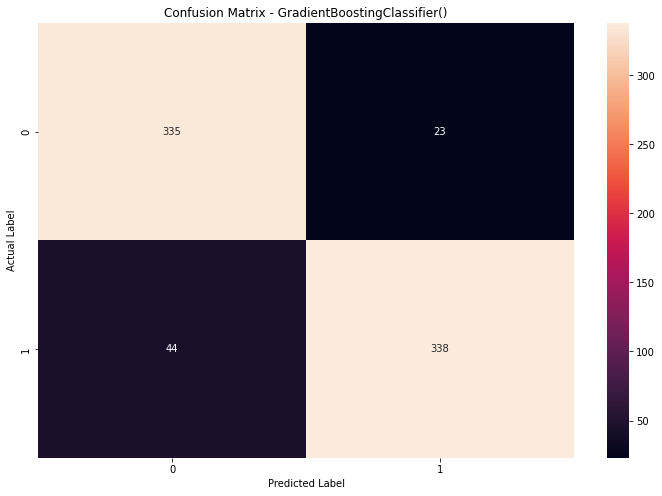

In [36]:
predict(gradientboosting)

#### XGBoost

Accuracy: 90.95%
Precision: 93.63%
Recall: 88.48%
F1_Score: 90.98%


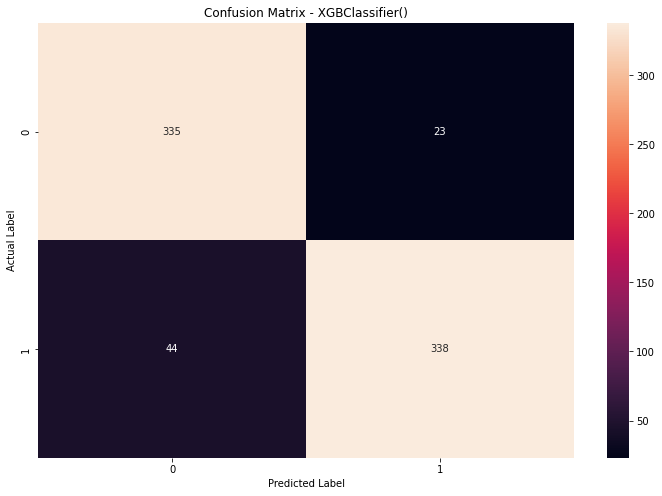

In [37]:
predict(xgboost)

## Hyperparameters

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
# Tunning Random Forest
randomforest_grid = {'n_estimators' : [100,150,200,250,300,350,400,450,500],
                    'max_depth':[5,1,15,20,25,30,40,50],
                    'criterion': ['gini','entropy'],
                    'min_samples_leaf':[2,5,8,10],
                    'min_samples_split': [2,5,8,10],
                    'max_features':['auto','sqrt']}
rf_tuning = RandomForestClassifier()
rf_search = RandomizedSearchCV(rf_tuning,param_distributions = randomforest_grid,
                              cv = 10, n_iter = 10, n_jobs = 1, verbose = 1, scoring = 'recall')
rf_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 1, 15, 20, 25, 30, 40,
                                                      50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 5, 8, 10],
                                        'min_samples_split': [2, 5, 8, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   scoring='recall', verbose=1)

In [40]:
rf_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15,
 'criterion': 'entropy'}

Accuracy: 90.00%
Precision: 92.54%
Recall: 87.70%
F1_Score: 90.05%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

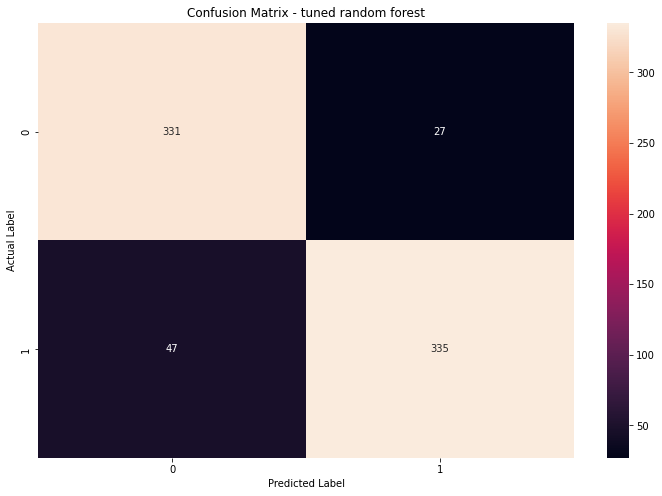

In [41]:
tuned_rf = RandomForestClassifier(**rf_search.best_params_)
tuned_rf.fit(X_train,y_train)
y_pred = tuned_rf.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred) * 100))
confusion_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - tuned random forest')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [42]:
# Tuning Ada Boost
grid = {'n_estimators' : [50,100,500,1500,2000],
       'learning_rate' : [0.05,0.1,1.0,0.15,0.2,1.5,2.0],
       'algorithm': ['SAMME', 'SAMME.R']}

adaboost = RandomizedSearchCV(AdaBoostClassifier(),
                             param_distributions = grid,
                             cv = 10,
                             n_iter = 10,
                              n_jobs = 1, 
                              verbose = 1, 
                              scoring = 'recall')
adaboost.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.05, 0.1, 1.0, 0.15,
                                                          0.2, 1.5, 2.0],
                                        'n_estimators': [50, 100, 500, 1500,
                                                         2000]},
                   scoring='recall', verbose=1)

In [43]:
adaboost.best_params_

{'n_estimators': 100, 'learning_rate': 1.5, 'algorithm': 'SAMME'}

Accuracy: 89.73%
Precision: 91.80%
Recall: 87.96%
F1_Score: 89.84%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

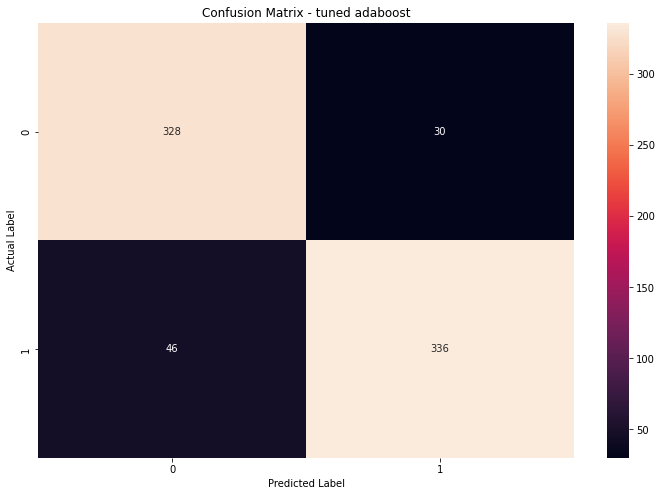

In [44]:
tuned_adaboost = AdaBoostClassifier(**adaboost.best_params_)
tuned_adaboost.fit(X_train,y_train)
y_pred = tuned_adaboost.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred) * 100))
confusion_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - tuned adaboost')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [45]:
# Tuning Gradient Boosting
grid2 = {'n_estimators':[500,1000,1500,2000,2500],
        'learning_rate':[0.01,0.05,0.2,0.1,0.15,0.3,0.5],
        'min_samples_split':[2,5,6,10],
        'min_samples_leaf':[3,5,8,12],
        'criterion': ['friedman_mse', 'squared_error', 'mse'],
        'subsample': [0.1,0.2,0.5,0.6,0.8,1.0]}

gradientboosting = RandomizedSearchCV(GradientBoostingClassifier(),
                             param_distributions = grid2,
                             cv = 10,
                             n_iter = 10, n_jobs = 1, verbose=1,
                             scoring = 'recall')
gradientboosting.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse'],
                                        'learning_rate': [0.01, 0.05, 0.2, 0.1,
                                                          0.15, 0.3, 0.5],
                                        'min_samples_leaf': [3, 5, 8, 12],
                                        'min_samples_split': [2, 5, 6, 10],
                                        'n_estimators': [500, 1000, 1500, 2000,
                                                         2500],
                                        'subsample': [0.1, 0.2, 0.5, 0.6, 0.8,
                                                      1.0]},
                   scoring='recall', verbose=1)

In [46]:
gradientboosting.best_params_

{'subsample': 0.1,
 'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'learning_rate': 0.15,
 'criterion': 'friedman_mse'}

Accuracy: 89.05%
Precision: 89.71%
Recall: 89.01%
F1_Score: 89.36%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

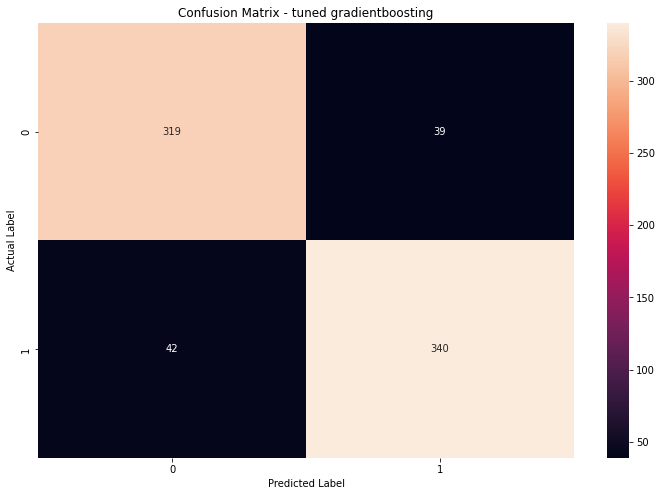

In [47]:
tuned_gradientboosting = GradientBoostingClassifier(**gradientboosting.best_params_)
tuned_gradientboosting.fit(X_train,y_train)
y_pred = tuned_gradientboosting.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred) * 100))
confusion_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - tuned gradientboosting')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [48]:
# Tuning XGBoost Classifier
grid3 = {'n_estimators': [100,150,200,250,300,350,400,450,500],
              'learning_rate': [0.01, 0.5,0.2, 1.0],
              'subsample': [0.3,0.5, 0.6,0.8,1.0],
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': [0.2,0.5, 0.4,0.8,1.0],
              'min_child_weight': [1, 2, 3, 4]}
xgb = RandomizedSearchCV(XGBClassifier(),
                             param_distributions = grid3,
                             cv = 10,
                             n_iter = 10, n_jobs = 1, verbose=1,
                             scoring = 'recall')
xgb.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=1,
                   param_distributions={'colsample_bytree': [0.2, 0.5, 0.4, 0.8,
                                                             1.0],
                                        'learning_rate': [0.01, 0.5, 0.2, 1.0],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500],
                                        'subsample': [0.3, 0.5, 0.6, 0.8, 1.0]},
                   scoring='recall', verbose=1)

In [49]:
xgb.best_params_

{'subsample': 0.6,
 'n_estimators': 300,
 'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.2,
 'colsample_bytree': 0.2}

Accuracy: 91.35%
Precision: 92.97%
Recall: 90.05%
F1_Score: 91.49%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

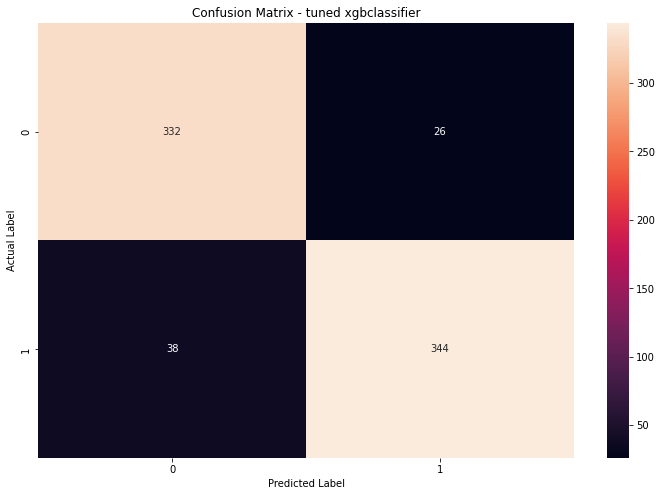

In [50]:
tuned_xgb = XGBClassifier(**xgb.best_params_)
tuned_xgb.fit(X_train,y_train)
y_pred = tuned_xgb.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred) * 100))
confusion_matrix_model = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - tuned xgbclassifier')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])